In [36]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12, 8)})

In [37]:
# prepare time series data
class TimeSeries():
    def __init__(self,x_min, x_max, num_points):
        self._x_min = x_min
        self._x_max = x_max
        self._interval = (x_max - x_min)/num_points
        self._x = np.linspace(self._x_min, self._x_max, num_points)
        self._y = np.sin(self._x)
        
    def next_batch(self, batch_size, steps):
        x_start = np.random.rand(batch_size,1)*(self._x_max - self._x_min - steps * self._interval) + self._x_min 
        x_batch = x_start + np.arange(0, steps+1) * self._interval
        y_batch = np.sin(x_batch)
        return x_batch[:,:-1].reshape(-1, steps, 1), y_batch[:,:-1].reshape(-1, steps, 1)
    

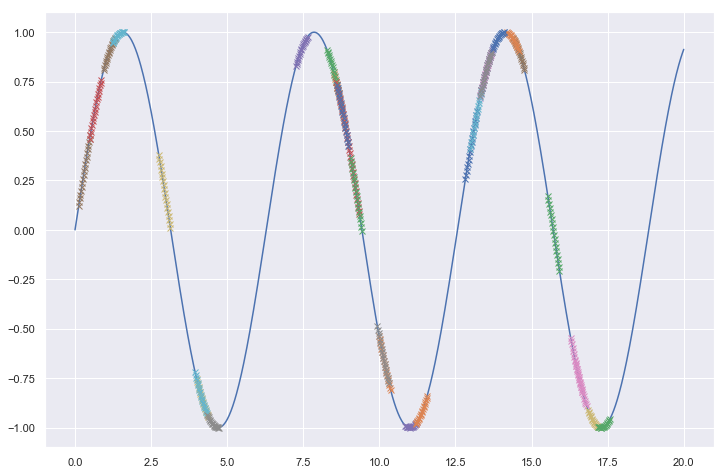

In [38]:
# generate data
ts = TimeSeries(0,20,1000)

# plot sine curve
sns.lineplot(x = ts._x, y=ts._y)

# plot batch overlay
for x,y in zip(*ts.next_batch(32,20)):
    plt.plot(x,y,"x")

In [39]:
class LSTM():
    def __init__(self, flags):
        
        # input
        self.input_x = tf.placeholder(tf.float32, shape=[flags["batch_size"], flags["step_size"], 1], name="input_x")
        self.input_y = tf.placeholder(tf.float32, shape=[flags["batch_size"], flags["step_size"], 1], name="input_y")
        
        # lstm
        self.cell = tf.keras.layers.LSTMCell(flags["units_size"])
        self.lstm = tf.keras.layers.RNN(self.cell,
                                  return_sequences = True,
                                  return_state = True,
                                  stateful = True)
        self.output, self.hidden_state, self.cell_state = self.lstm(self.input_x)
        
        # loss
        self.output_y = tf.keras.layers.Dense(1)(self.output)
        self.loss = tf.reduce_mean(tf.square(self.output_y - self.input_y))
        
        # optim
        self.optimizer = tf.train.AdamOptimizer(
                learning_rate=flags["learning_rate"]).minimize(self.loss)

In [43]:
FLAGS = {
    "num_epochs": 2000,
    "eval_per_epoch": 100,
    "batch_size": 32, # no. of examples
    "step_size": 20, # no. of steps along x axis
    "units_size": 100, # no. of hidden/cell state
    "learning_rate": 0.001
}

model = LSTM(FLAGS)

init = tf.global_variables_initializer()

epoch 0 loss 1.2797279
epoch 100 loss 0.49687138
epoch 200 loss 0.37956658
epoch 300 loss 0.23975042
epoch 400 loss 0.1329701
epoch 500 loss 0.109653436
epoch 600 loss 0.0873381
epoch 700 loss 0.089931026
epoch 800 loss 0.08190106
epoch 900 loss 0.074982986
epoch 1000 loss 0.08635527
epoch 1100 loss 0.05382855
epoch 1200 loss 0.061809022
epoch 1300 loss 0.051330645
epoch 1400 loss 0.059556413
epoch 1500 loss 0.050744183
epoch 1600 loss 0.046861313
epoch 1700 loss 0.047386453
epoch 1800 loss 0.044934146
epoch 1900 loss 0.03863038
epoch 2000 loss 0.04063037


/Users/zhiyang.wang/miniconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


epoch 2100 loss 0.030252254
epoch 2200 loss 0.025042605
epoch 2300 loss 0.04084014
epoch 2400 loss 0.03408898
epoch 2500 loss 0.030656213
epoch 2600 loss 0.024478106
epoch 2700 loss 0.032542564
epoch 2800 loss 0.024010539
epoch 2900 loss 0.029792344
epoch 3000 loss 0.027606254
epoch 3100 loss 0.028205836
epoch 3200 loss 0.027082812
epoch 3300 loss 0.026001614
epoch 3400 loss 0.01794054
epoch 3500 loss 0.027884532
epoch 3600 loss 0.022429172
epoch 3700 loss 0.019333323
epoch 3800 loss 0.020152409
epoch 3900 loss 0.027161395
epoch 4000 loss 0.016103273
epoch 4100 loss 0.016918458
epoch 4200 loss 0.01373901
epoch 4300 loss 0.025091637
epoch 4400 loss 0.01624951
epoch 4500 loss 0.016545901
epoch 4600 loss 0.01617616
epoch 4700 loss 0.014987385
epoch 4800 loss 0.017103504
epoch 4900 loss 0.017231941


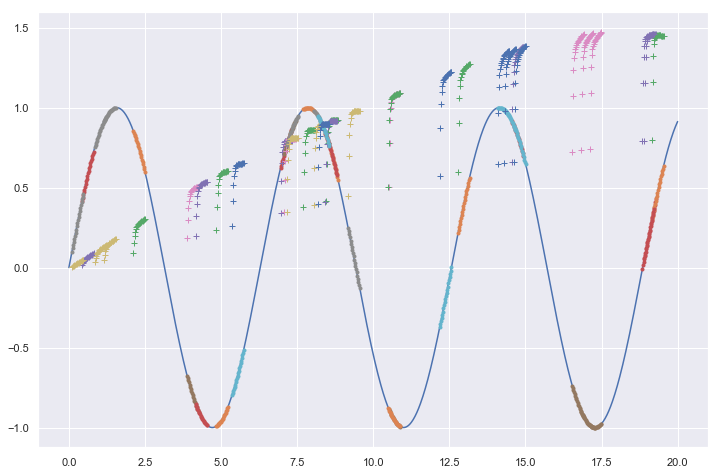

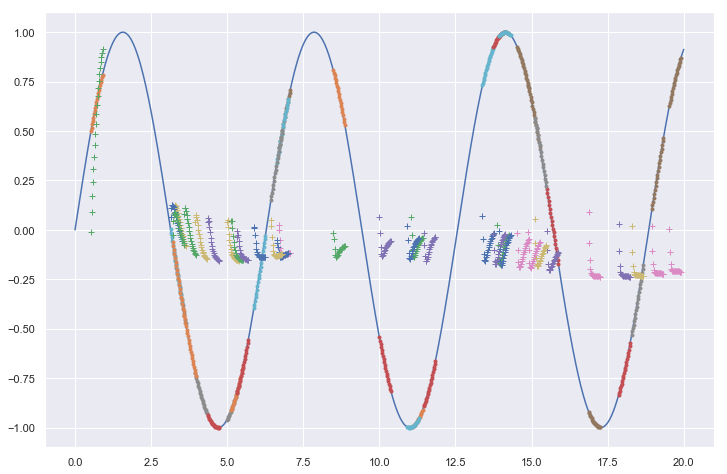

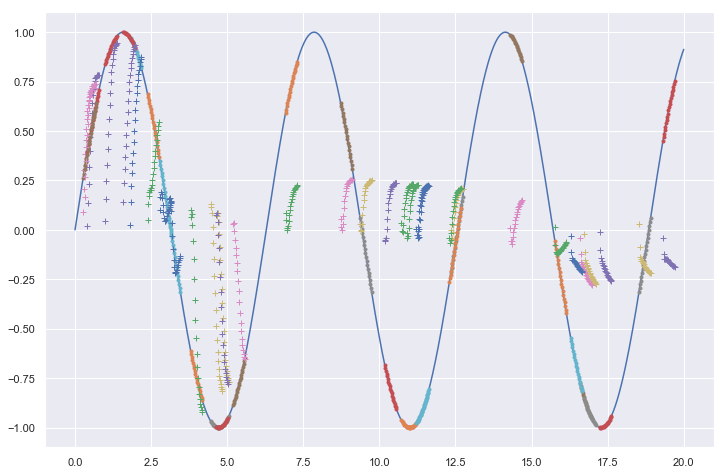

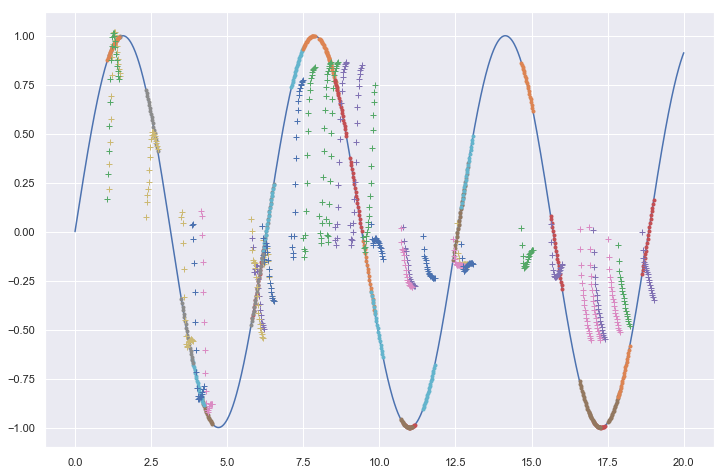

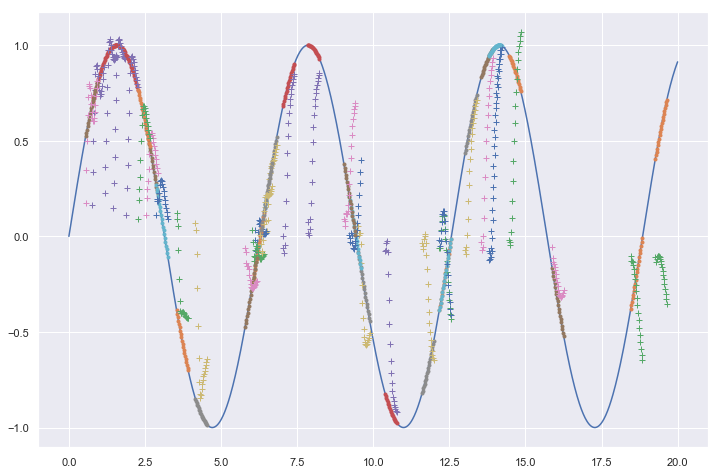

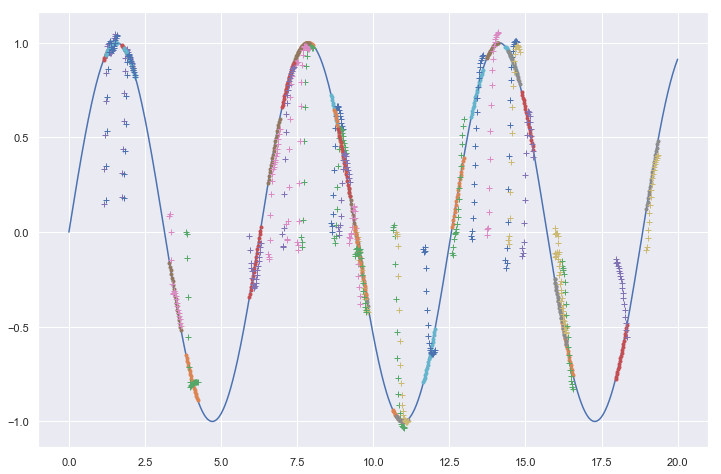

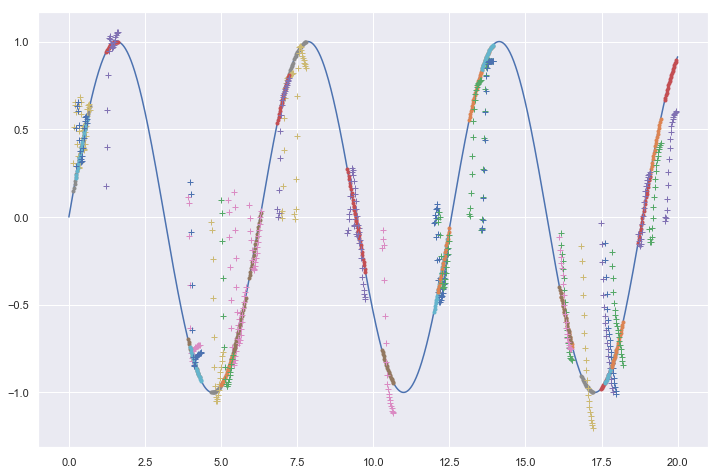

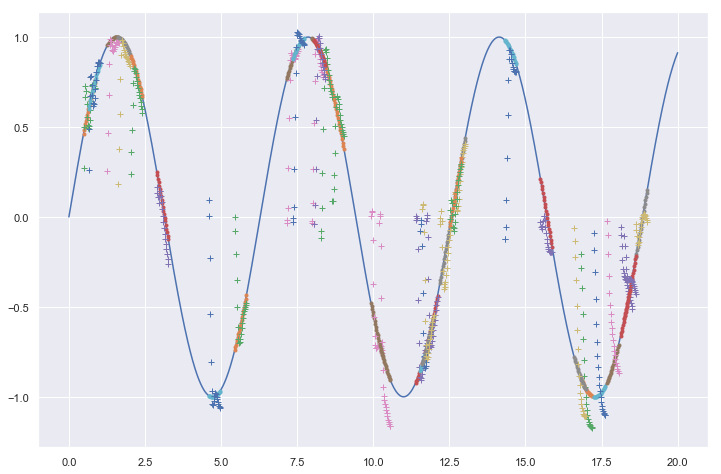

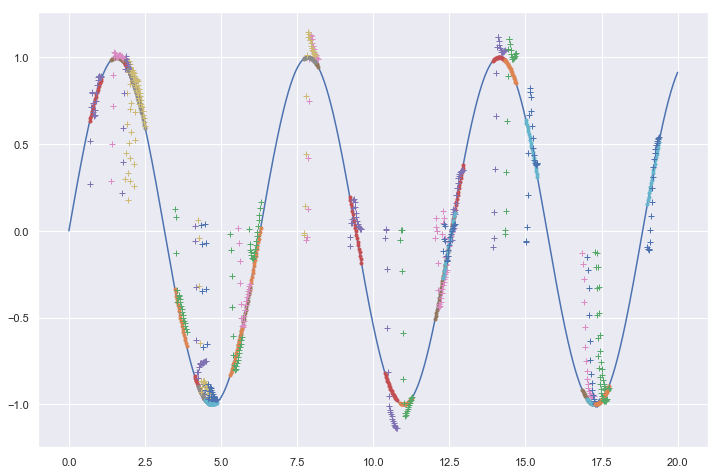

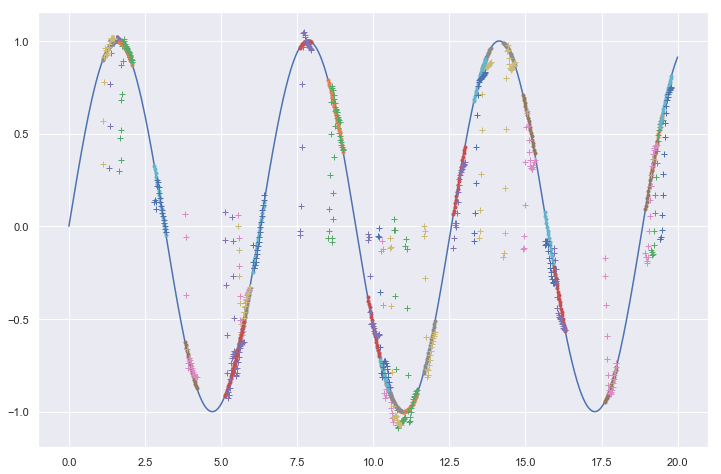

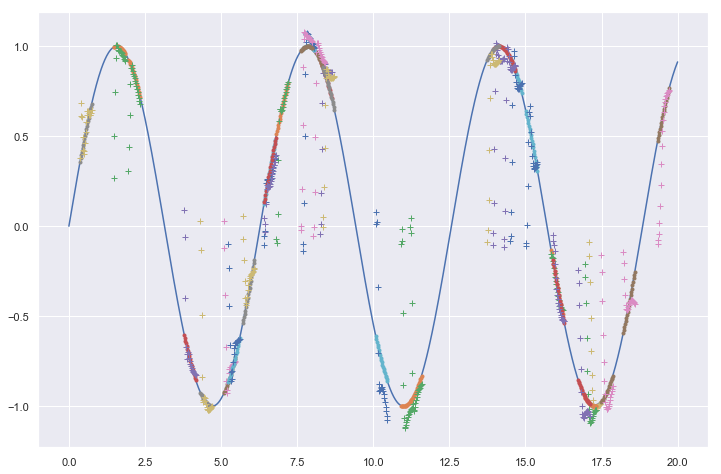

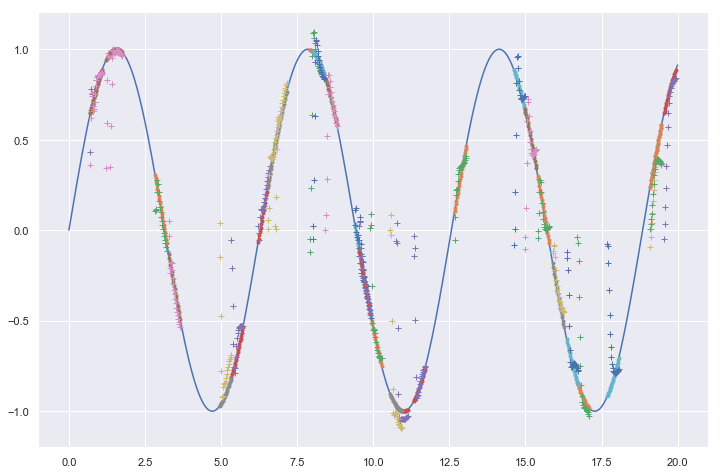

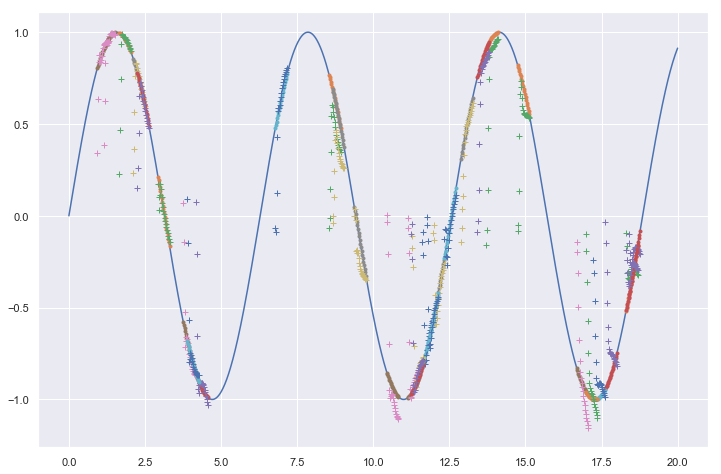

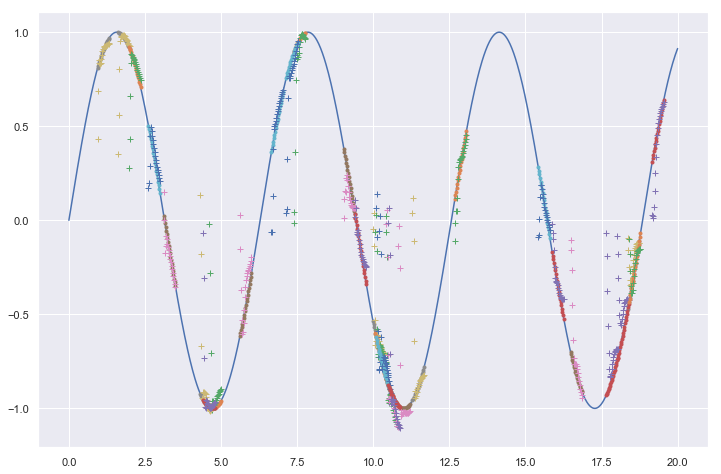

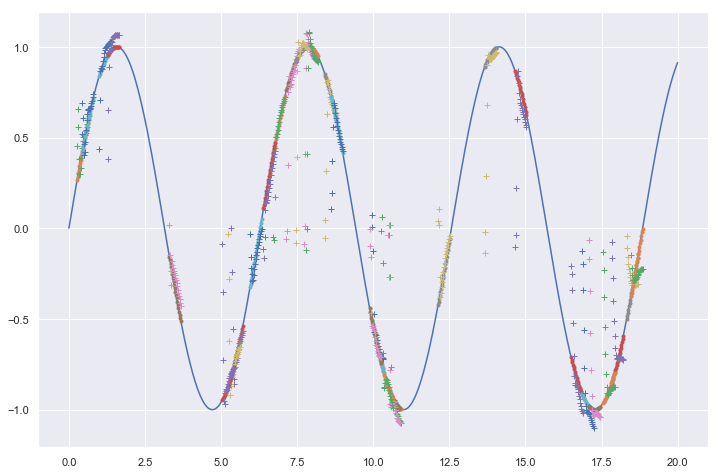

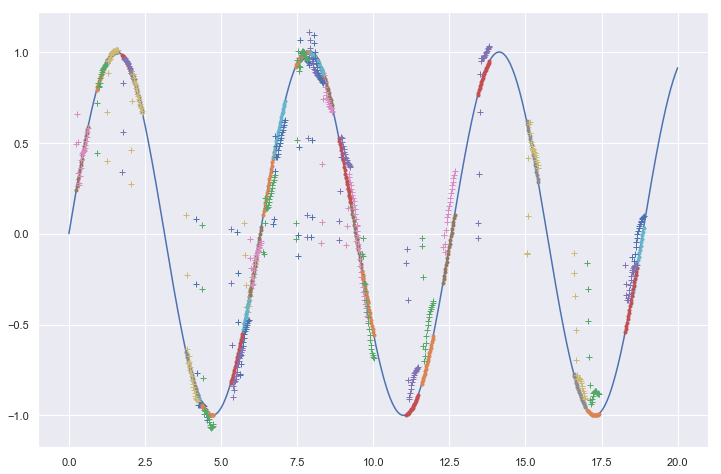

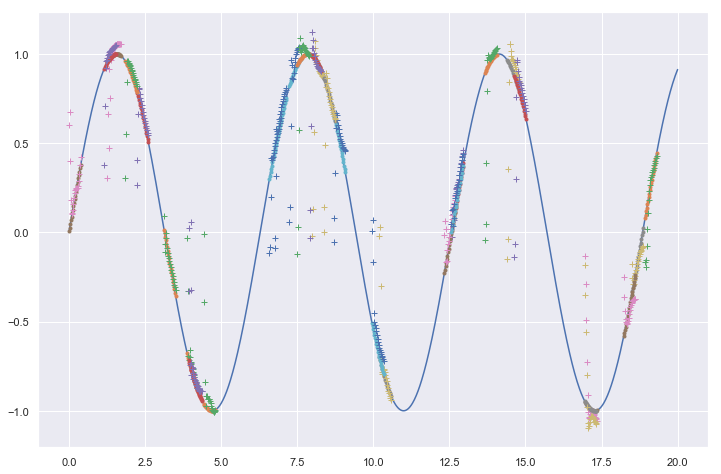

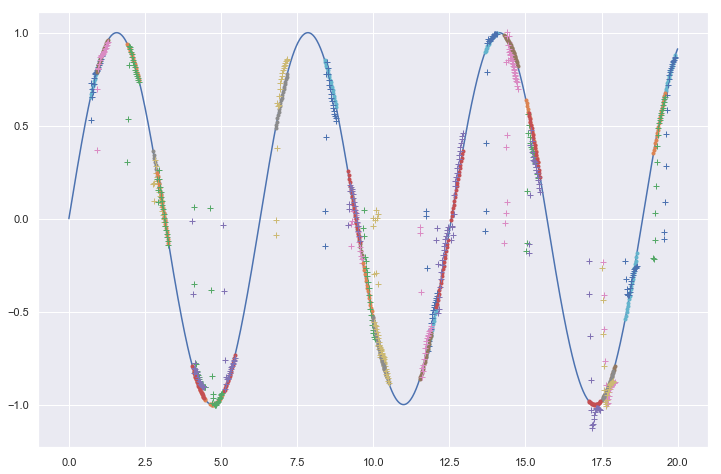

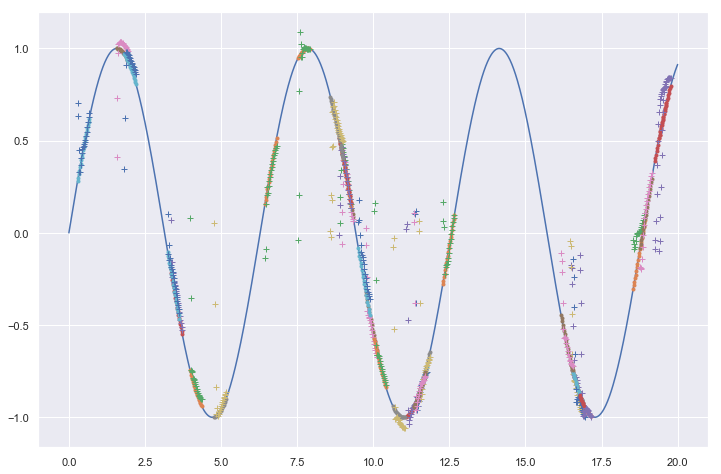

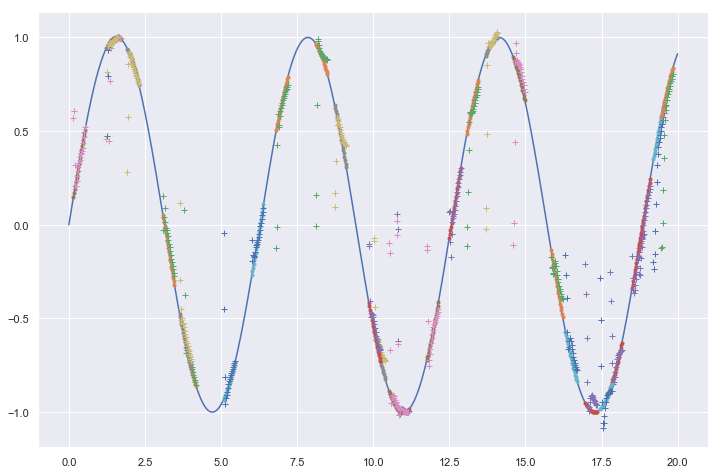

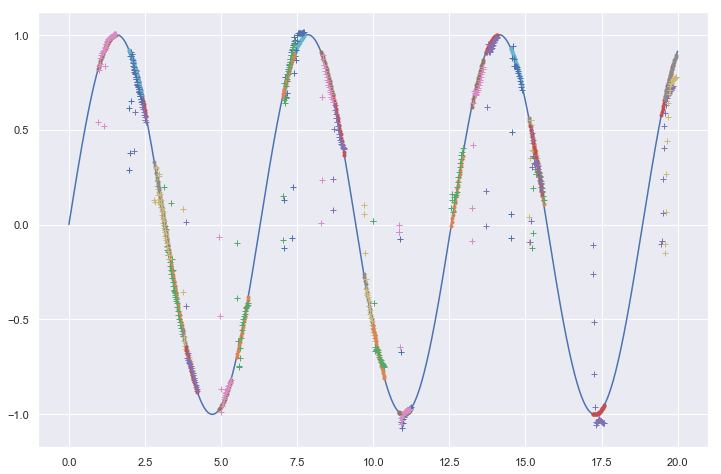

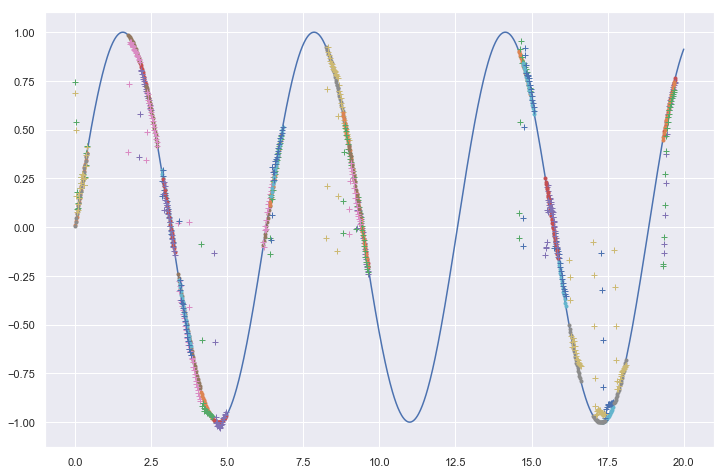

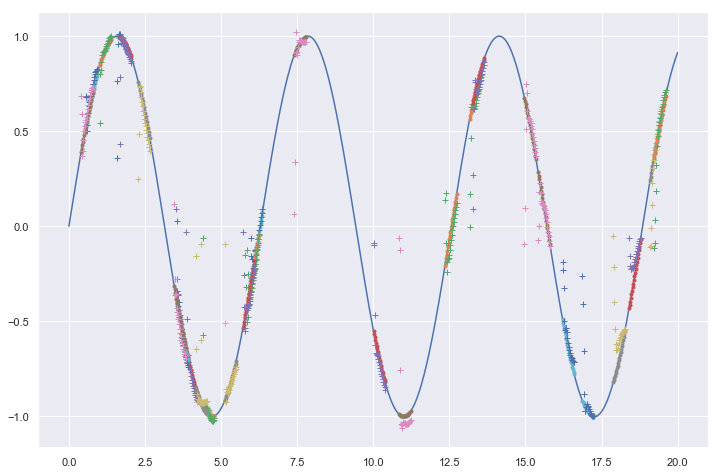

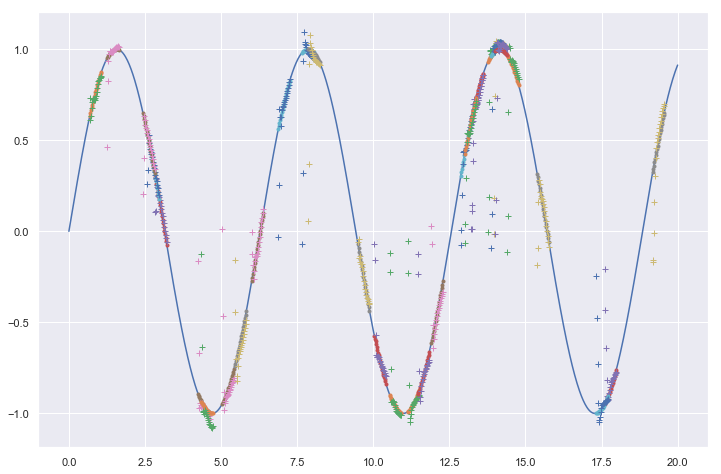

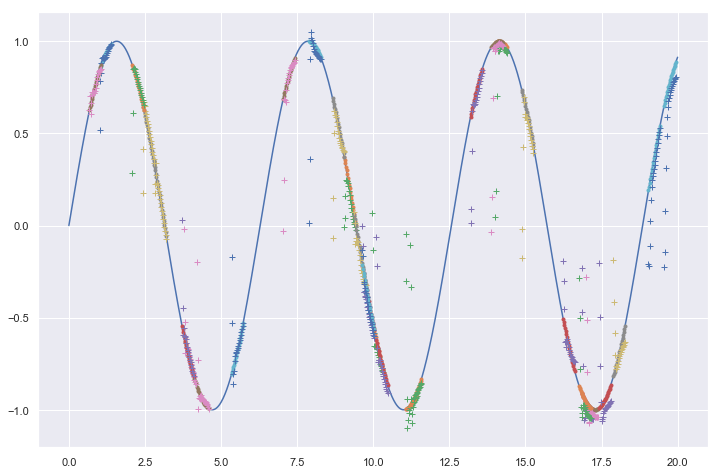

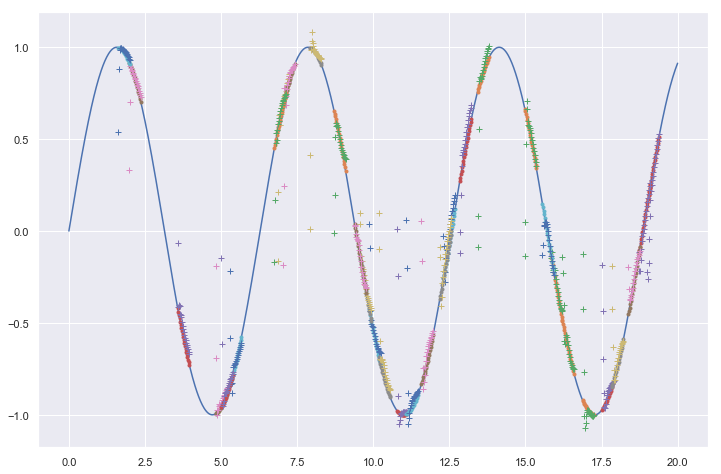

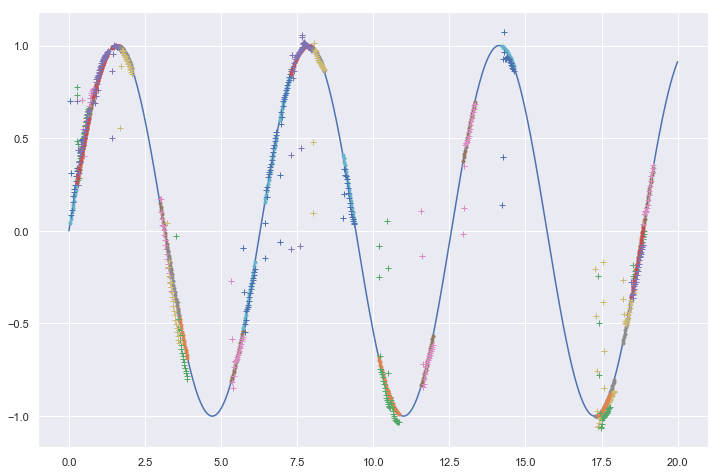

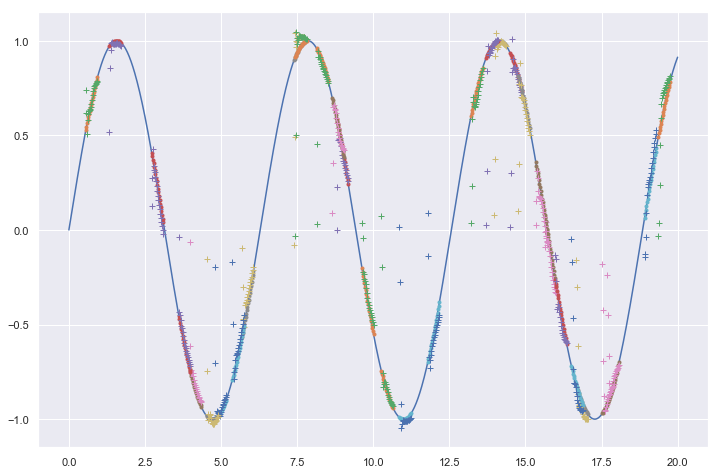

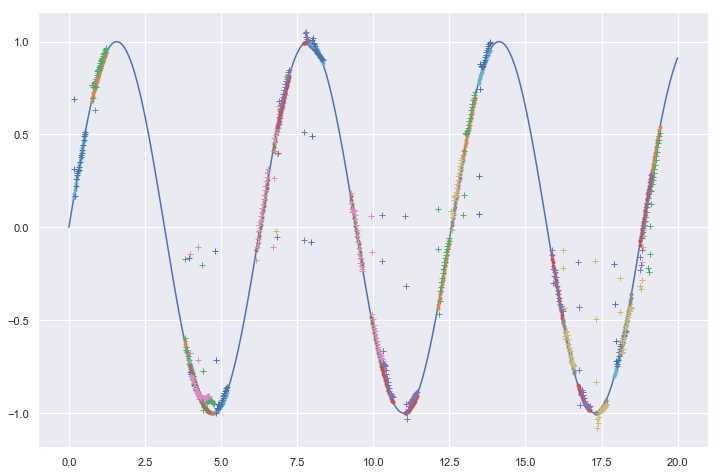

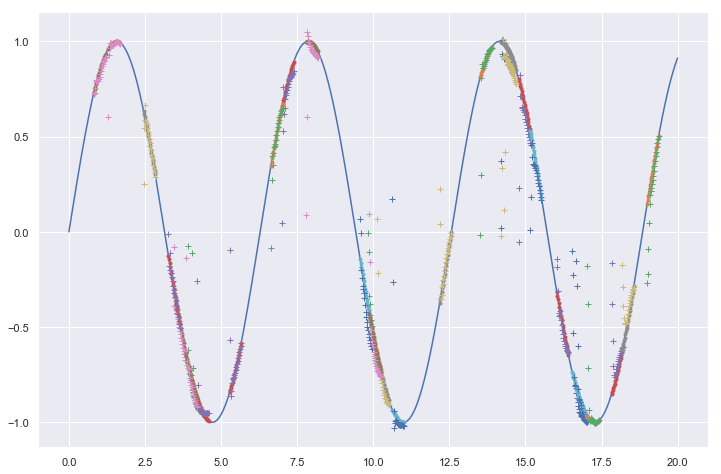

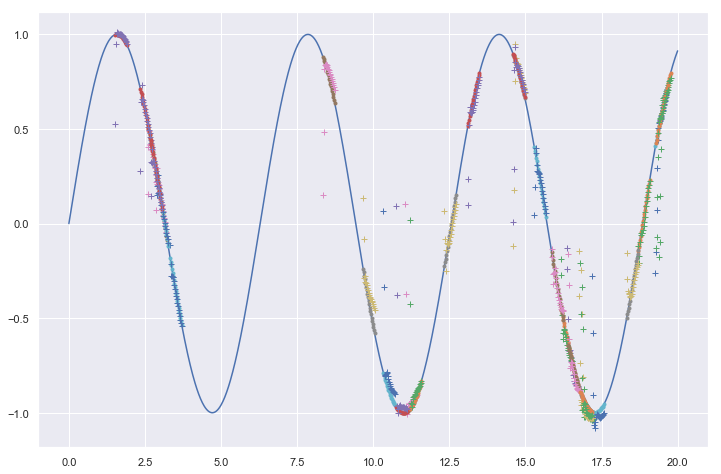

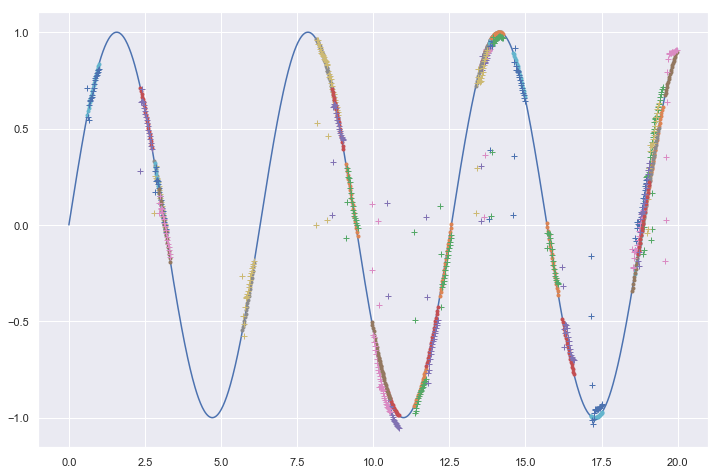

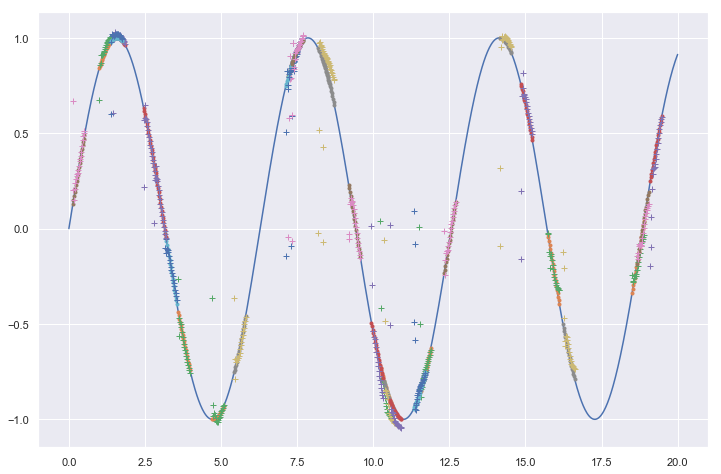

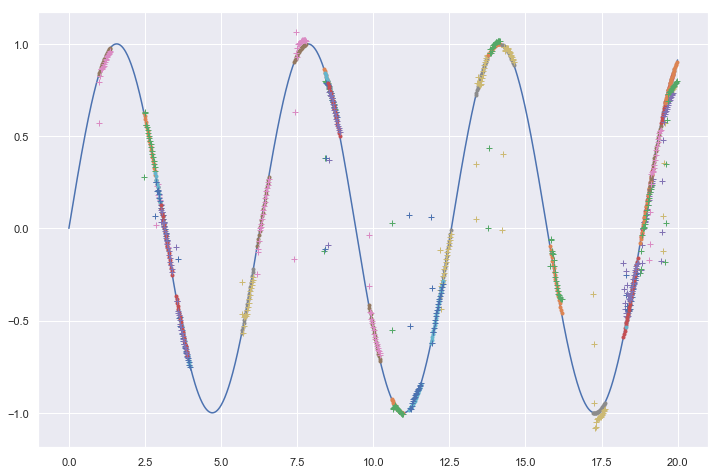

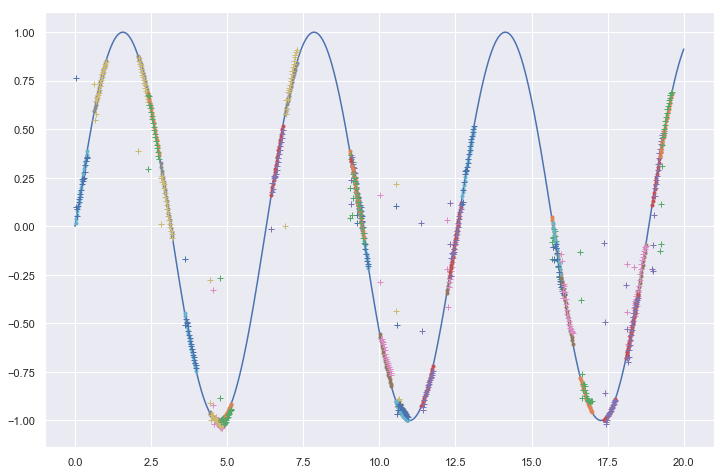

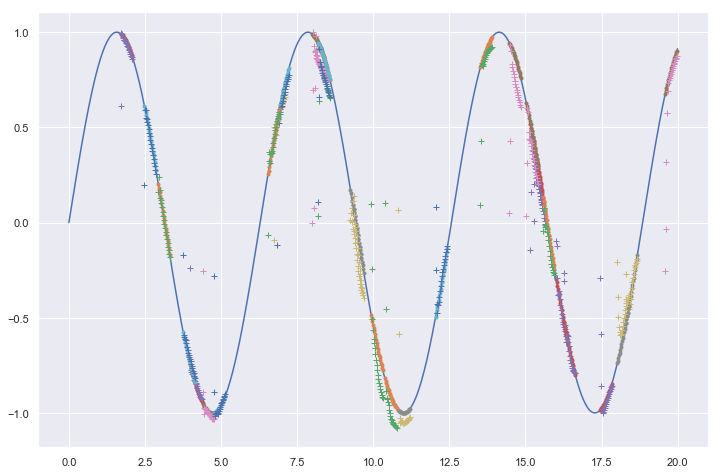

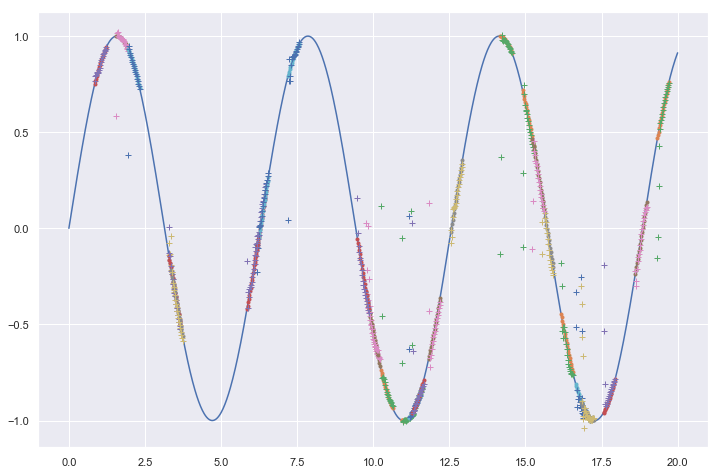

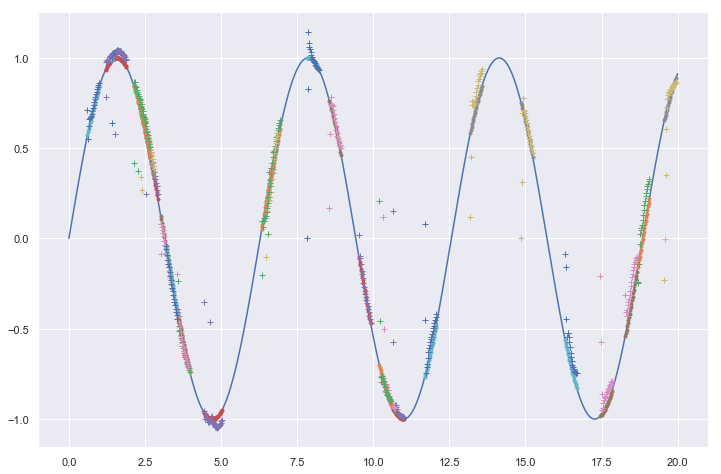

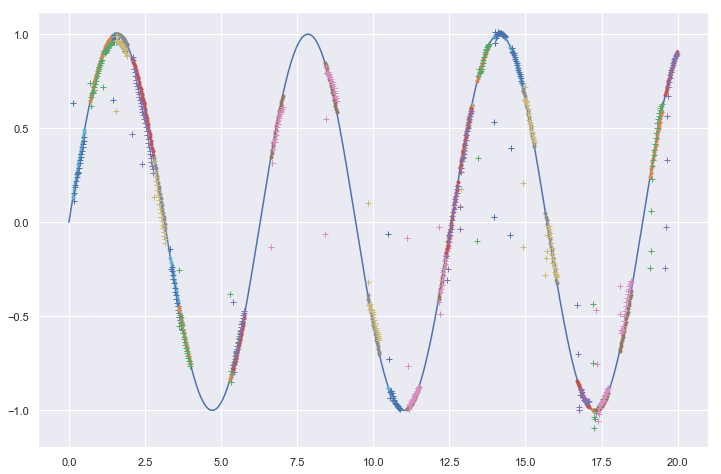

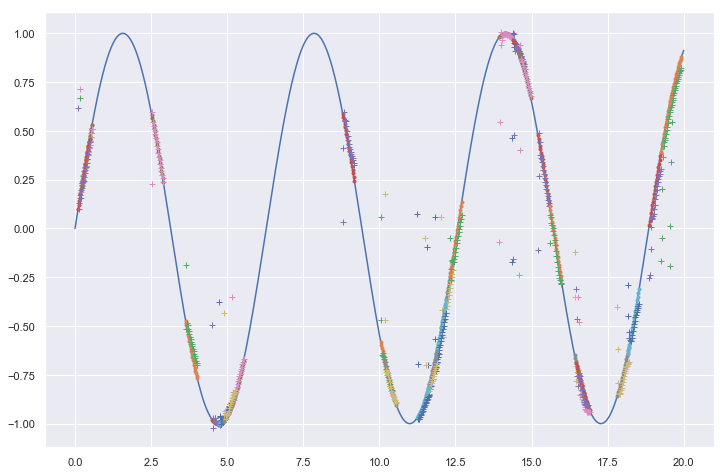

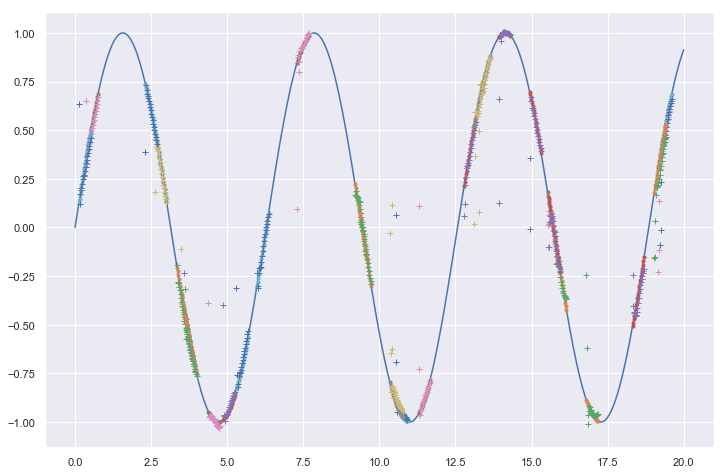

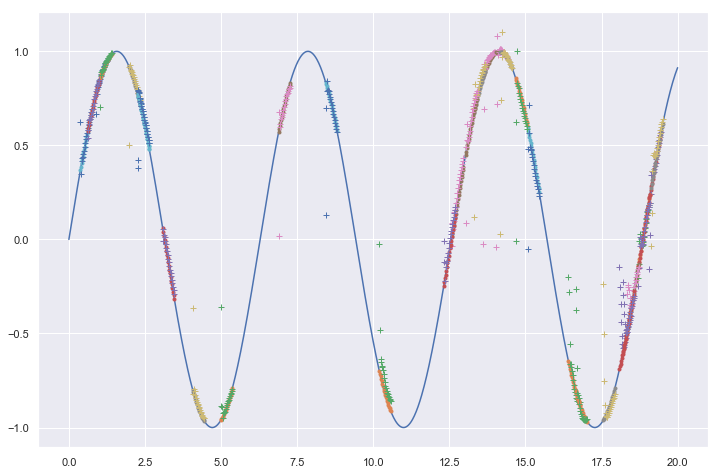

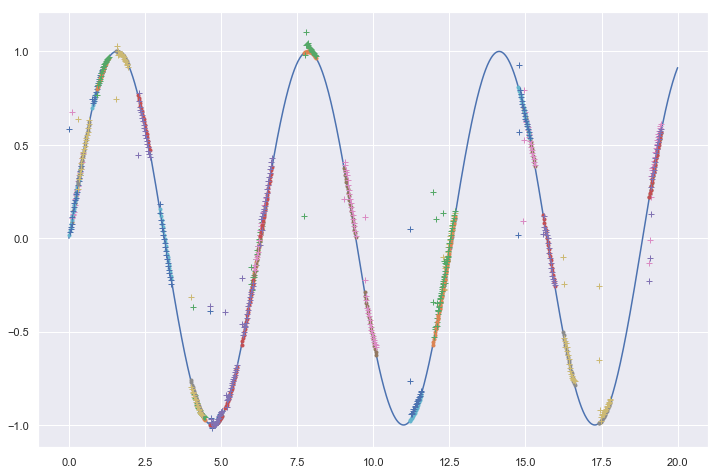

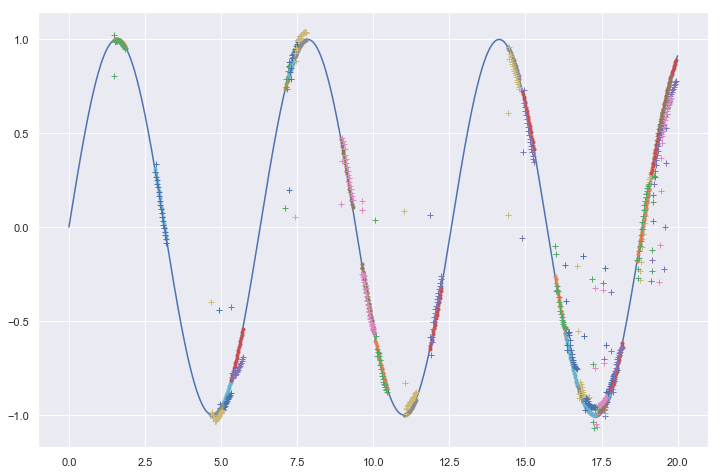

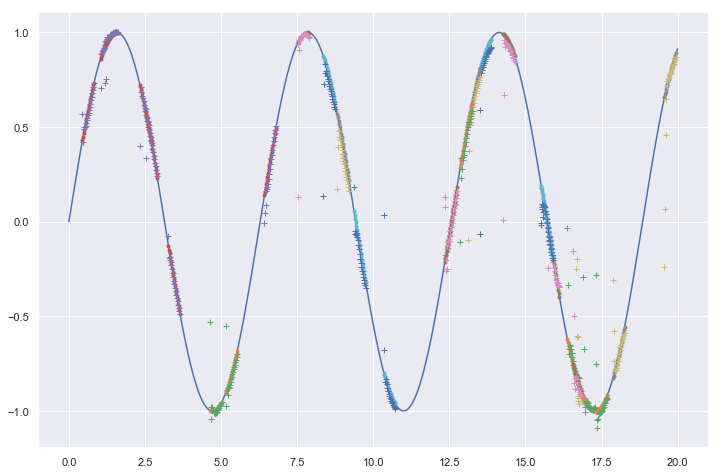

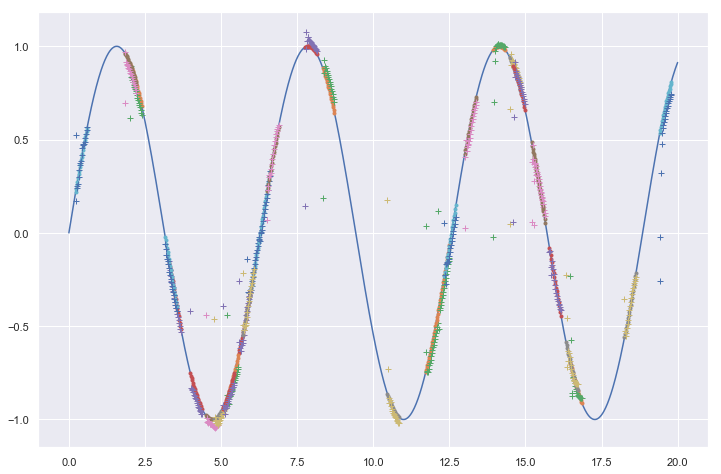

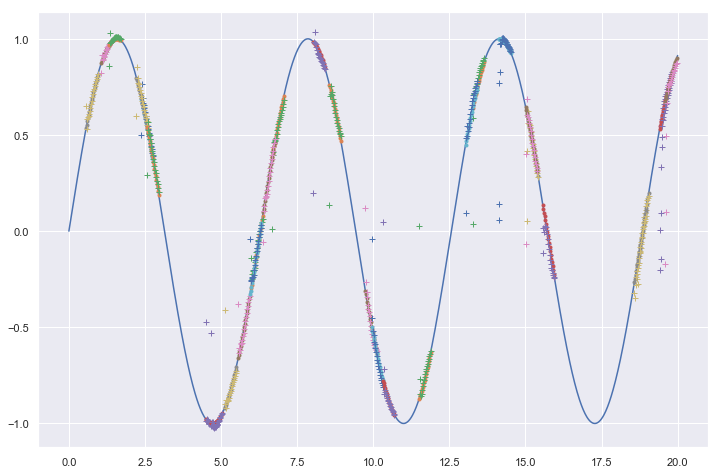

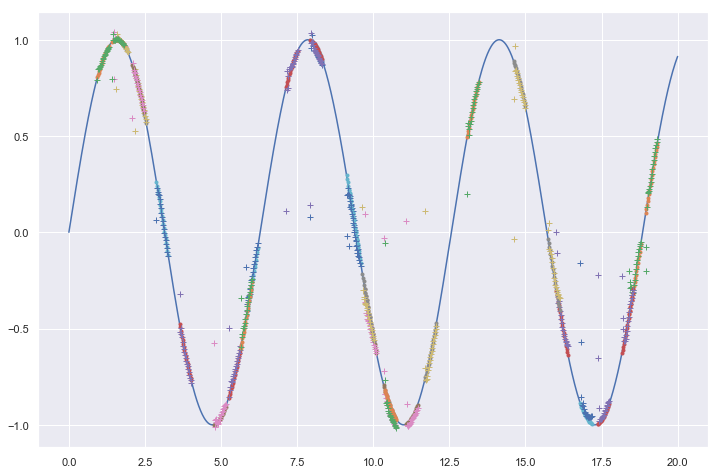

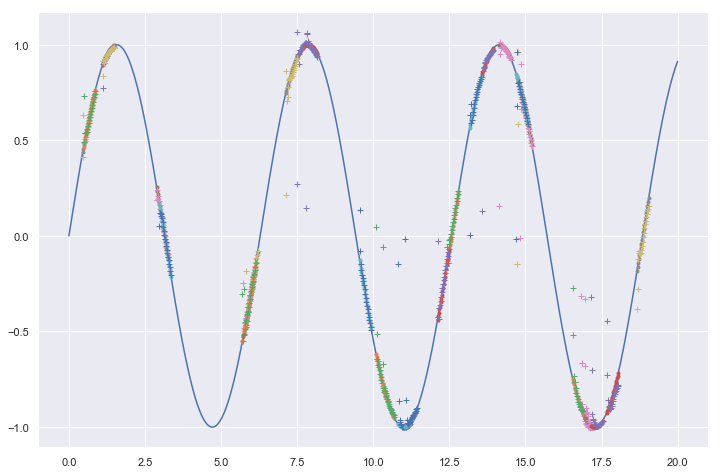

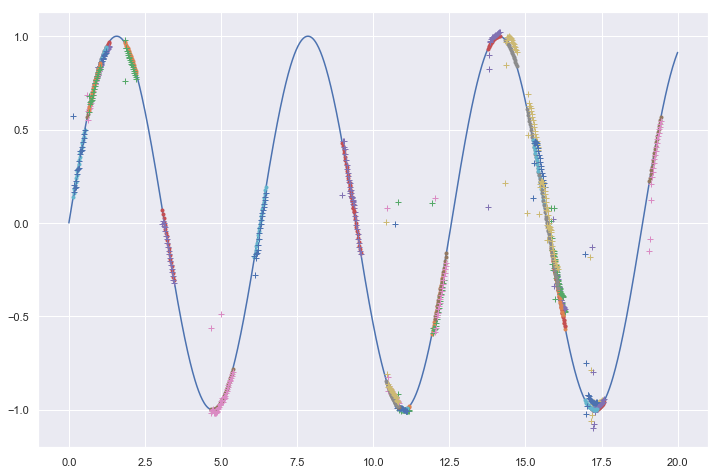

In [44]:
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(FLAGS["num_epochs"]):
        # generate a new set of batch
        x_batch, y_batch = ts.next_batch(FLAGS["batch_size"], FLAGS["step_size"])
        
        # train
        output_y,loss, _ = sess.run([model.output_y, model.loss, model.optimizer], feed_dict={
                model.input_x: x_batch,
                model.input_y: y_batch,
            })
        
        # eval
        if epoch % FLAGS["eval_per_epoch"] == 0:
            print("epoch", epoch, "loss", loss)
            
            # plot true y and output y
            plt.figure()
            sns.lineplot(x = ts._x, y = ts._y)
            for x,y,o in zip(x_batch[:,:,0], y_batch[:,:,0], output_y[:,:,0]):
                plt.plot(x,y,".")
                plt.plot(x,o,"+")

In [ ]:
class GRU():
    def __init__(self, flags):
        pass